In [6]:
import pandas as pd

data = pd.read_csv("cleaned_superstore_data.csv")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# Group sales by month
monthly_sales = data.groupby(pd.Grouper(key='Order Date', freq='ME'))['Sales'].sum().reset_index()

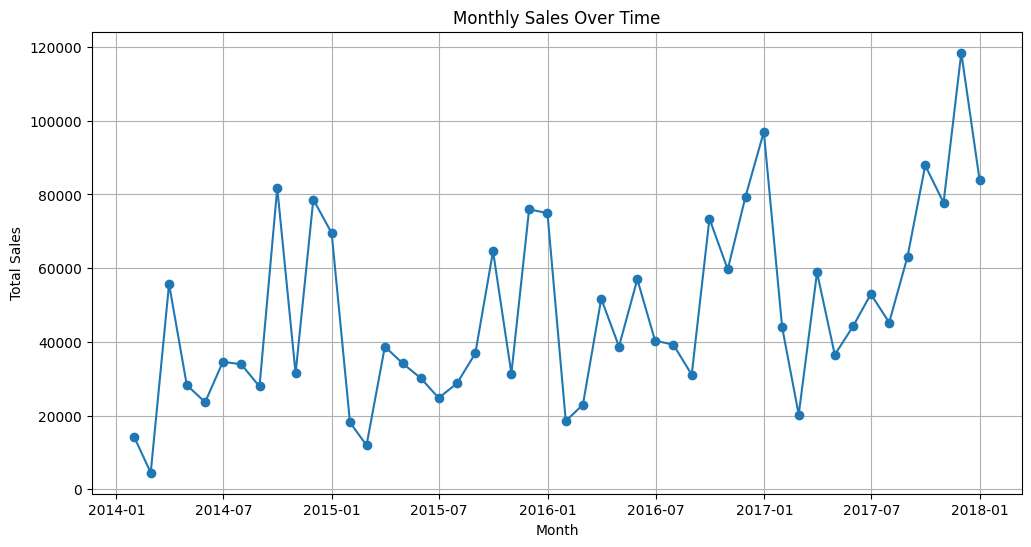

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], marker='o', linestyle='-')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()

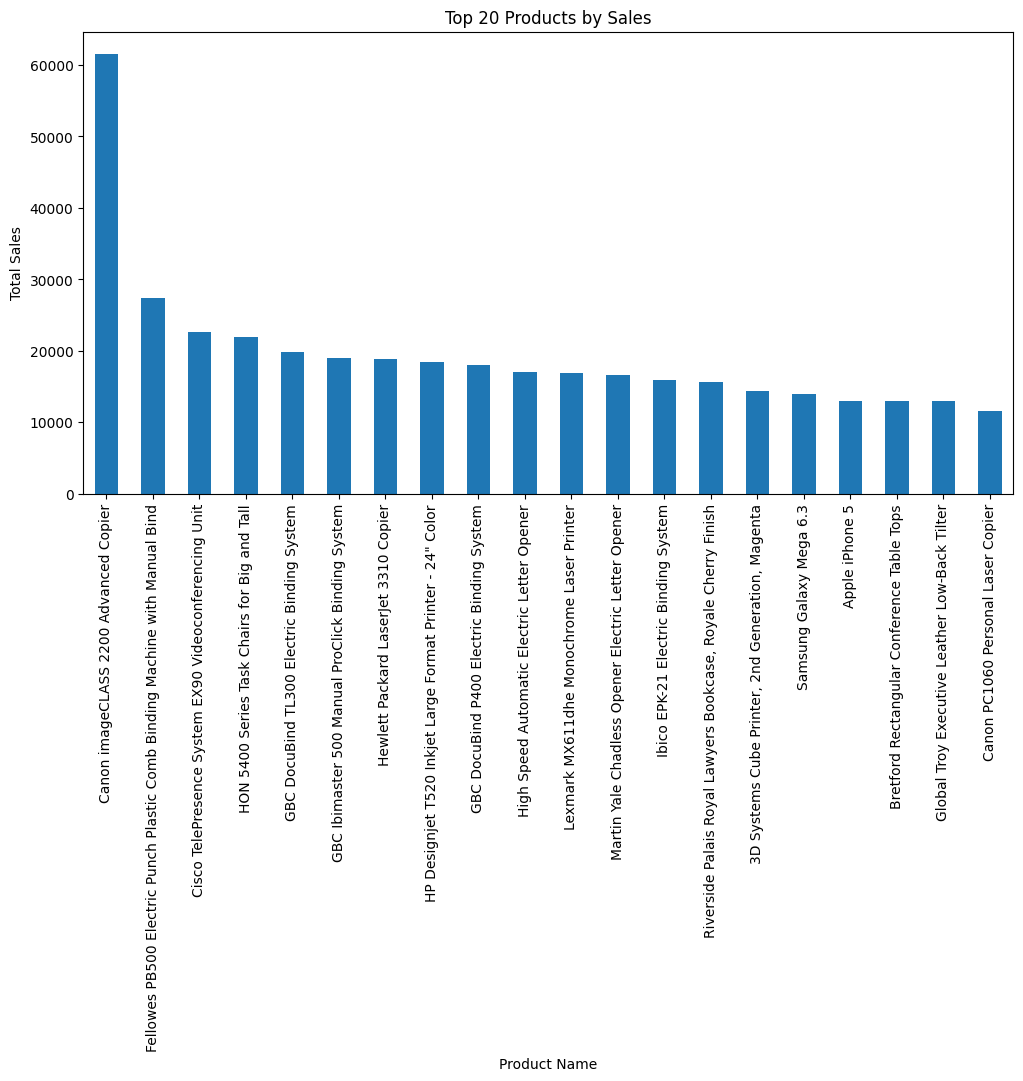

In [34]:
top_products = data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', title='Top 20 Products by Sales')
plt.ylabel('Total Sales')
plt.show()

Text(0, 0.5, '')

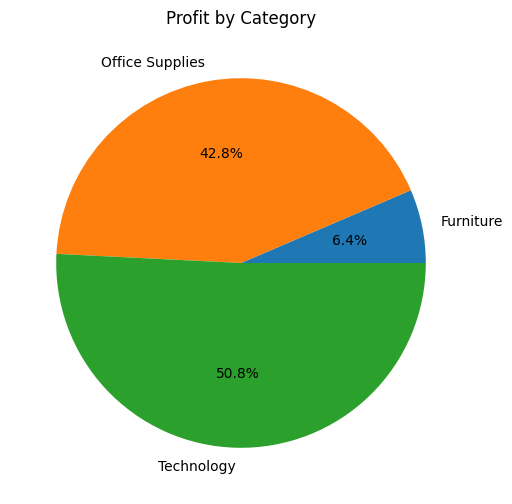

In [40]:
category_profit = data.groupby('Category')['Profit'].sum()

plt.figure(figsize=(12,6))
category_profit.plot(kind='pie', autopct='%1.1f%%', title='Profit by Category')
plt.ylabel("")

Text(0, 0.5, 'Total Sales')

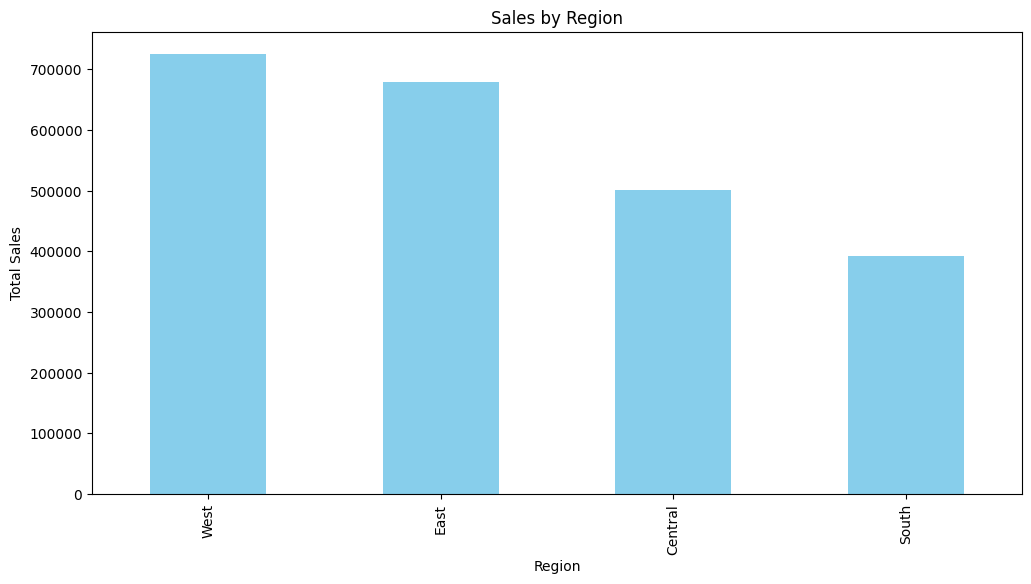

In [65]:
region_sales = data.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
region_sales.plot(kind='bar', color='skyblue', title='Sales by Region')
plt.ylabel("Total Sales")

Text(0.5, 1.0, 'Pareto Chart: Customer Spending Analysis 20% Customer with 80% Sales')

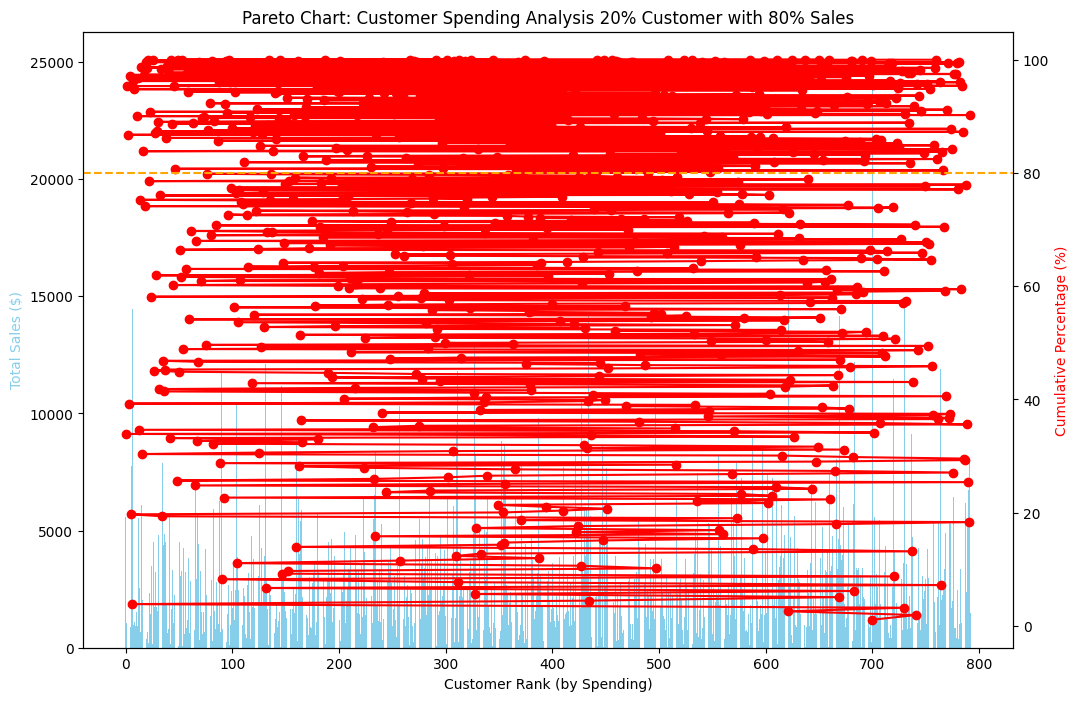

In [73]:
customer_spending = data.groupby('Customer ID')['Sales'].sum().reset_index()
customer_spending = customer_spending.sort_values(by='Sales', ascending=False)

# Calculate cumulative percentage
customer_spending['Cumulative Percentage'] = (customer_spending['Sales'].cumsum() / customer_spending['Sales'].sum()) * 100

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.bar(customer_spending.index, customer_spending['Sales'], color='skyblue')
ax1.set_xlabel('Customer Rank (by Spending)')
ax1.set_ylabel('Total Sales ($)', color='skyblue')

ax2 = ax1.twinx()
ax2.plot(customer_spending.index, customer_spending['Cumulative Percentage'], color='red', marker='o')
ax2.set_ylabel('Cumulative Percentage (%)', color='red')
ax2.axhline(80, color='orange', linestyle='--')

plt.title('Pareto Chart: Customer Spending Analysis 20% Customer with 80% Sales')

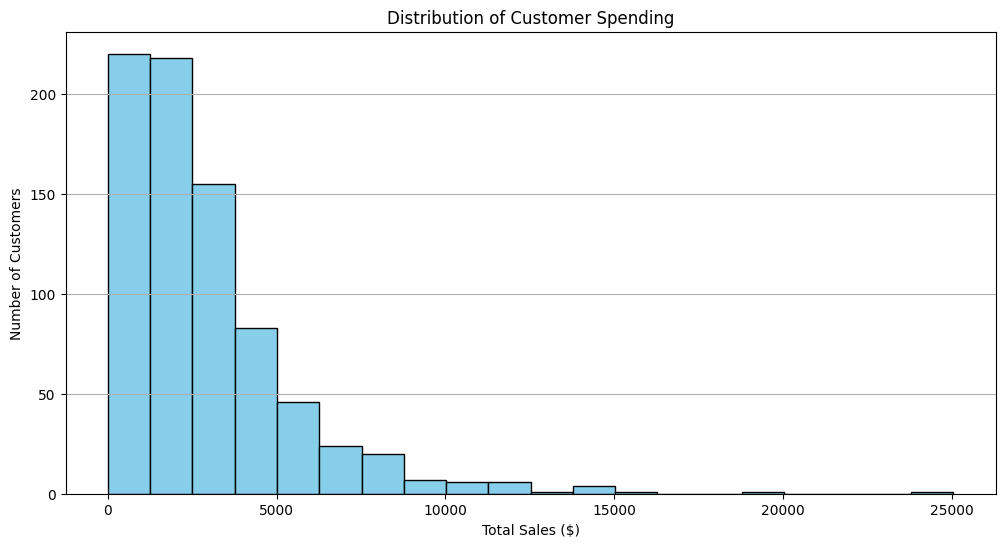

In [62]:
plt.figure(figsize=(12, 6))
plt.hist(customer_spending['Sales'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Spending')
plt.xlabel('Total Sales ($)')
plt.ylabel('Number of Customers')
plt.grid(axis='y')

Text(0.5, 0, 'Total Sales ($)')

<Figure size 1200x600 with 0 Axes>

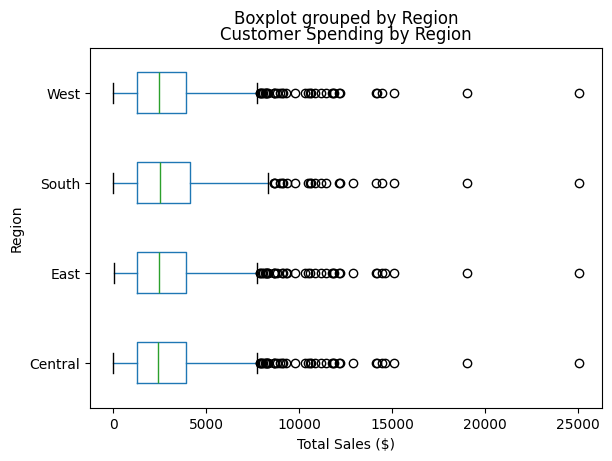

In [61]:
# Merge with original data to get segments (Region')
segmented_spending = pd.merge(customer_spending, data[['Customer ID', 'Region']].drop_duplicates(), on='Customer ID')

plt.figure(figsize=(12, 6))
segmented_spending.boxplot(column='Sales', by='Region', grid=False, vert=False)
plt.title('Customer Spending by Region')
plt.xlabel('Total Sales ($)')

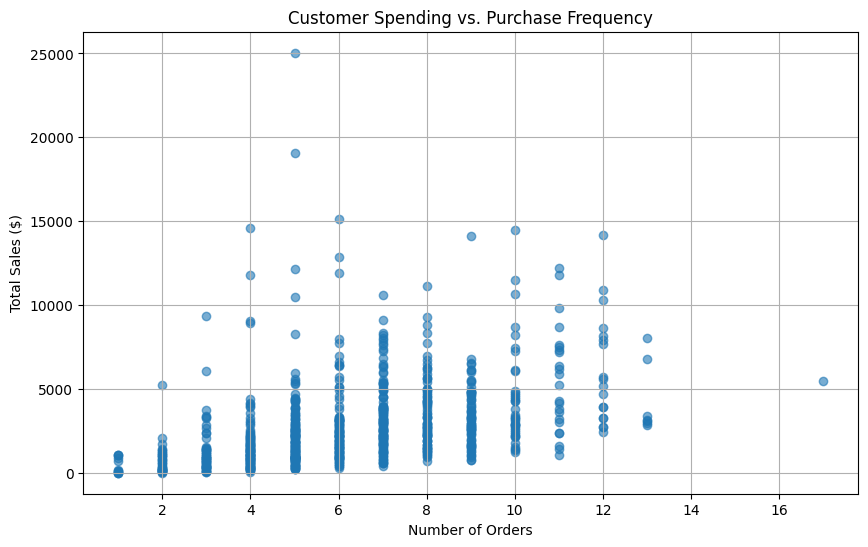

In [78]:
# Calculate purchase frequency
customer_frequency = data.groupby('Customer ID')['Order ID'].nunique().reset_index()
customer_analysis = pd.merge(customer_spending, customer_frequency, on='Customer ID')

plt.figure(figsize=(10, 6))
plt.scatter(customer_analysis['Order ID'], customer_analysis['Sales'], alpha=0.6)
plt.title('Customer Spending vs. Purchase Frequency')
plt.xlabel('Number of Orders')
plt.ylabel('Total Sales ($)')
plt.grid(True)